In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Data.csv")

In [4]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [5]:
df.shape

(10, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [7]:
df.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [8]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [9]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [12]:
df[['Age','Salary']].corr()

,Age,Salary
Age,1.000000,0.982495
Salary,0.982495,1.000000


#Exploratory Data Analysis

1. Understand the data

In [14]:
df.shape

(10, 4)

In [15]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [18]:
df.sample(3)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
9,France,37.0,67000.0,Yes
5,France,35.0,58000.0,Yes


In [19]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [21]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [22]:
df[['Age','Salary']].corr()

,Age,Salary
Age,1.000000,0.982495
Salary,0.982495,1.000000


In [24]:
df.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [26]:
df.duplicated().sum()

np.int64(0)

#Univariate Analysis

1. Numerical Data

<Axes: xlabel='Salary', ylabel='Count'>

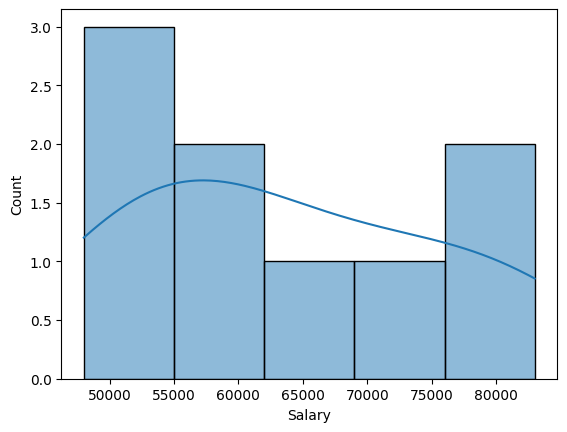

In [30]:
#Histogram
sns.histplot(x='Salary',data=df,kde=True)

<Axes: xlabel='Salary'>

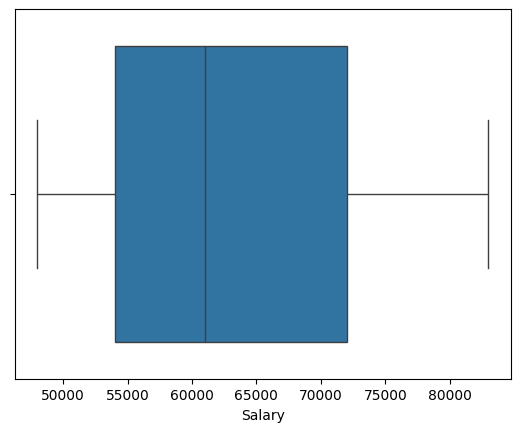

In [33]:
#Boxplot
sns.boxplot(x='Salary',data=df)

<Axes: xlabel='Age', ylabel='Density'>

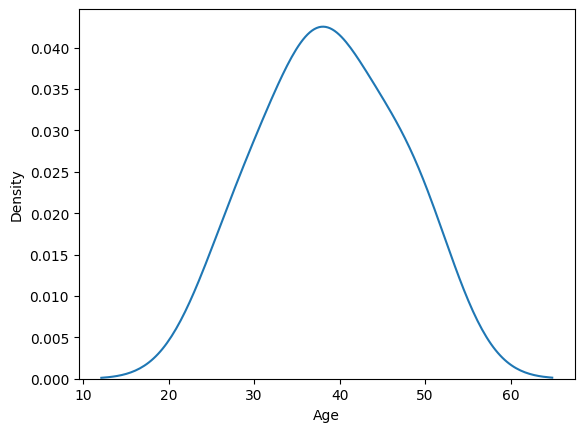

In [34]:
#Density Plot
sns.kdeplot(x='Age',data=df)

2. Univariate analysis on categorical columns

In [35]:
#Frequency count
df['Purchased'].value_counts()

,count
Purchased,
No,5
Yes,5


<Axes: xlabel='Purchased', ylabel='count'>

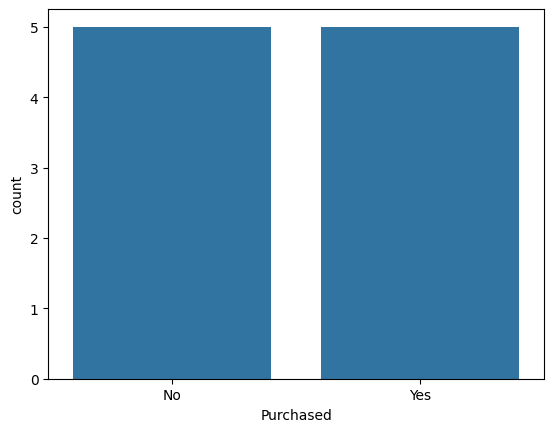

In [36]:
#Count Plot
sns.countplot(x='Purchased',data=df)

<Axes: ylabel='count'>

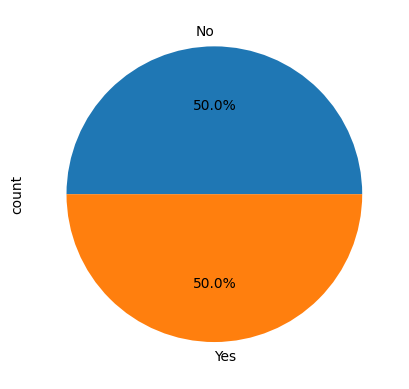

In [37]:
#Pie chart
df['Purchased'].value_counts().plot.pie(autopct='%.1f%%')

#Bivariate and Multivariate analysis

Numerical --> Numerical

<Axes: xlabel='Age', ylabel='Salary'>

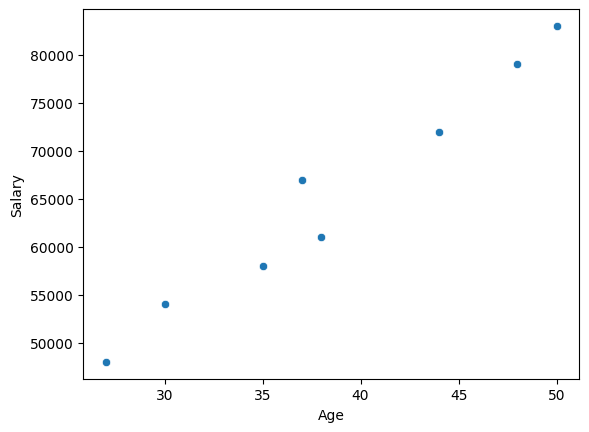

In [39]:
#Bivariate
sns.scatterplot(x='Age',y='Salary',data=df)

<Axes: xlabel='Age', ylabel='Salary'>

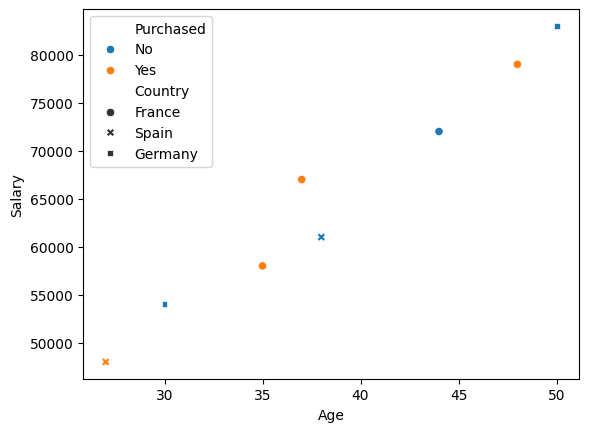

In [41]:
#Multivariate
sns.scatterplot(x='Age',y='Salary',data=df,hue='Purchased',style='Country')

<Axes: xlabel='Age', ylabel='Salary'>

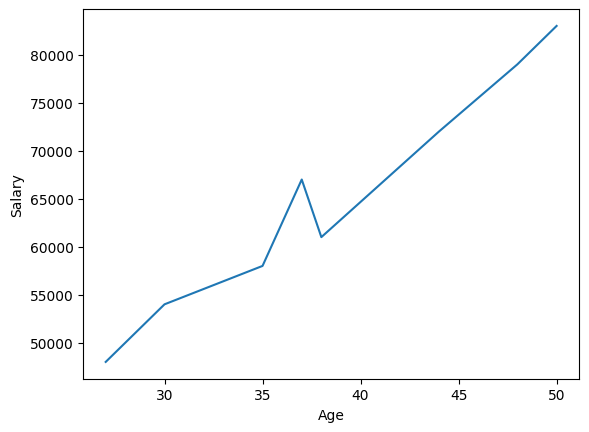

In [44]:
#Line plot for bivariate
sns.lineplot(x='Age',y='Salary',data=df)

<Axes: xlabel='Age', ylabel='Salary'>

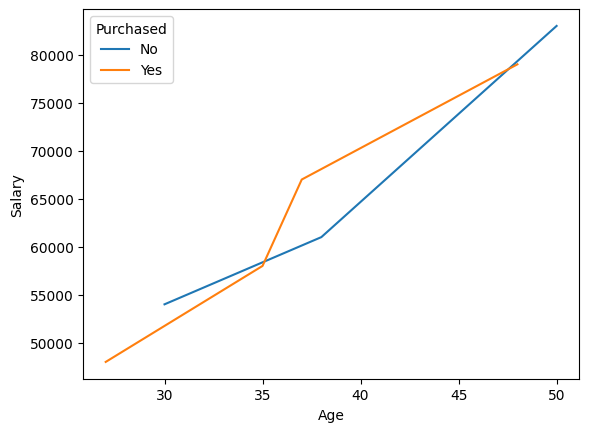

In [46]:
#Lineplot for multivariate analysis
sns.lineplot(x='Age',y='Salary',data=df,hue='Purchased')

#Numerical --> Categorical

<Axes: xlabel='Age', ylabel='Purchased'>

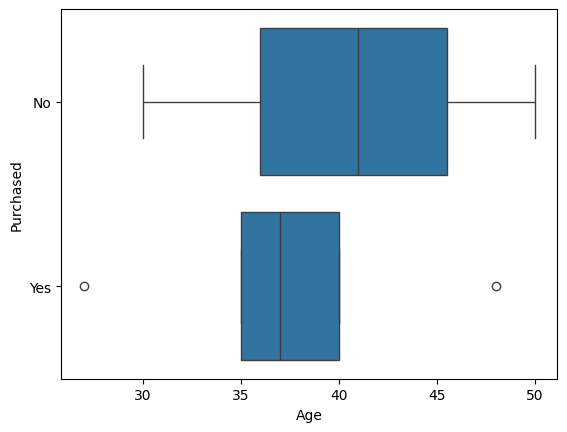

In [53]:
#Boxplot for bivariate analysis
sns.boxplot(x='Age',y='Purchased',data=df)

<Axes: xlabel='Purchased', ylabel='Age'>

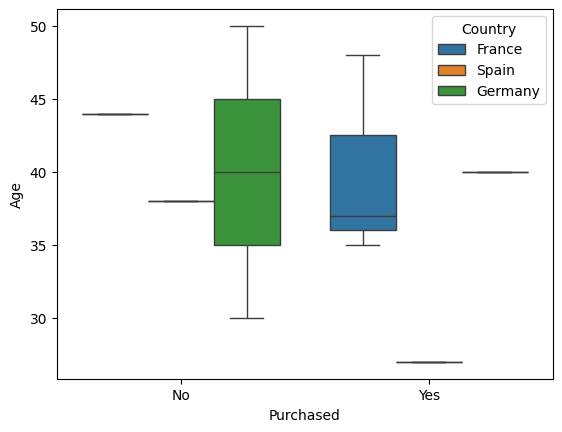

In [52]:
#Boxplot for multivariate analysis
sns.boxplot(y='Age',x='Purchased',data=df,hue='Country')

<Axes: xlabel='Country', ylabel='Salary'>

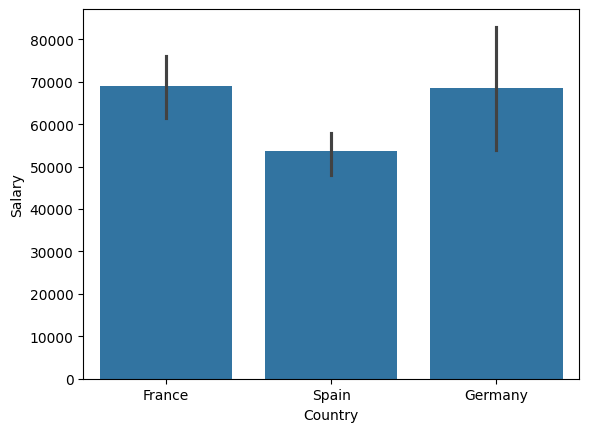

In [58]:
#Barplot for bivariate analysis
sns.barplot(x='Country',y='Salary',data=df)

<Axes: xlabel='Country', ylabel='Salary'>

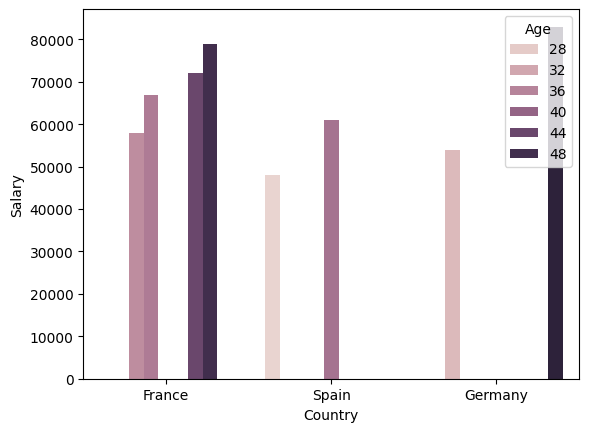

In [60]:
#Barplot for multivariate analysis
sns.barplot(x='Country',y='Salary',data=df,hue='Age')

#Categorical -- > categorical

<Axes: xlabel='Country', ylabel='count'>

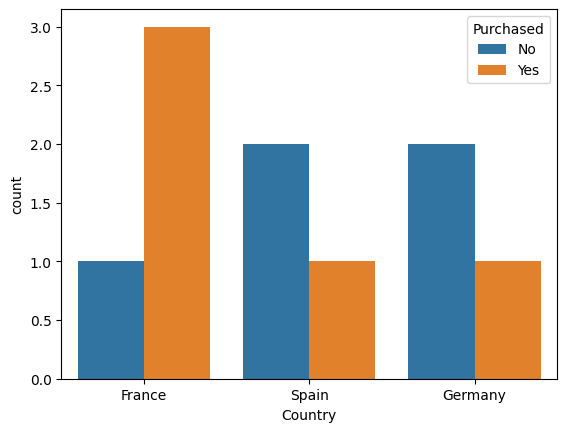

In [64]:
#countplot
sns.countplot(x='Country',hue='Purchased',data=df)

In [65]:
#Crosstab
pd.crosstab(df['Country'],df['Purchased'])

Purchased,No,Yes
Country,,
France,1,3
Germany,2,1
Spain,2,1


#**FEATURE ENGINEERING**.

1. Feature Scaling.  
(i). Standardization.  
Standard scaler calculates mean and standard deviation

In [84]:
X=df.drop(columns=['Country','Purchased'])
y=df['Purchased']

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)


In [87]:
X_scaled

array([[-0.7061388 , -0.57897373],
       [ 0.94151841,  0.95452425],
       [ 1.6738105 ,  1.72127325],
       [-1.62150392, -1.01711601],
       [-0.33999276,  0.4068464 ],
       [ 0.20922631,         nan],
       [-0.15691973, -0.25036702],
       [        nan, -1.23618715]])

2.Normalisation.  
(i). MinMaxScaler calculates Min and max values and scales the value in the range [0-1]

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)

In [89]:
x_train_scaled

array([[0.27777778, 0.22222222],
       [0.77777778, 0.74074074],
       [1.        , 1.        ],
       [0.        , 0.07407407],
       [0.38888889, 0.55555556],
       [0.55555556,        nan],
       [0.44444444, 0.33333333],
       [       nan, 0.        ]])

(ii).Max Absolute Scaling:- Calculates the magnitude of maximum value.

In [91]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
x_train_scaled=scaler.fit_transform(X_train)

In [92]:
x_train_scaled

array([[0.72916667, 0.73417722],
       [0.91666667, 0.91139241],
       [1.        , 1.        ],
       [0.625     , 0.6835443 ],
       [0.77083333, 0.84810127],
       [0.83333333,        nan],
       [0.79166667, 0.7721519 ],
       [       nan, 0.65822785]])

(iii).Robust Scaler. calculates median and iqr

In [93]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train_scaled=scaler.fit_transform(X_train)

In [94]:
x_train_scaled

array([[-0.5       , -0.22222222],
       [ 1.        ,  0.81481481],
       [ 1.66666667,  1.33333333],
       [-1.33333333, -0.51851852],
       [-0.16666667,  0.44444444],
       [ 0.33333333,         nan],
       [ 0.        ,  0.        ],
       [        nan, -0.66666667]])

#**EncodingTechniques**.

1.Label Encoding:- similar to ordinal encoding but appllied mainly to target column

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Purchased_encoded']=le.fit_transform(df['Purchased'])

In [96]:
df['Purchased_encoded']

,Purchased_encoded
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,1


2.Ordinal Encoding:- applied on categorical columns which follow some specific order.

In [97]:
#LOADING ANOTHER DATASET

In [98]:
df=pd.read_csv('/content/Customer Purchase.csv')

In [100]:
df.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [110]:
df.shape

(50, 6)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [112]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Education,0
Review,0
Purchased,0


In [113]:
df[['Customer ID','Age']].corr()

,Customer ID,Age
Customer ID,1.000000,-0.014186
Age,-0.014186,1.000000


In [120]:
x=df.iloc[:,:5]
y=df['Purchased']

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [122]:
x_train.head()

,Customer ID,Age,Gender,Education,Review
12,1033,51,Male,School,Poor
4,1025,16,Female,UG,Average
37,1058,94,Male,PG,Average
8,1029,65,Female,UG,Average
3,1024,72,Female,PG,Good


In [123]:
y_train.head()

,Purchased
12,No
4,No
37,Yes
8,No
3,No


#Label Encoding.

In [124]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Purchased_encoded']=le.fit_transform(df['Purchased'])
df['Purchased_encoded'].value_counts()

,count
Purchased_encoded,
0,26
1,24


#Ordinal Encoding--> Performed on Categorical columns.

In [125]:
x_train.head()

,Customer ID,Age,Gender,Education,Review
12,1033,51,Male,School,Poor
4,1025,16,Female,UG,Average
37,1058,94,Male,PG,Average
8,1029,65,Female,UG,Average
3,1024,72,Female,PG,Good


In [130]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['School','UG','PG'],['Poor','Average','Good']])
oe.categories

[['School', 'UG', 'PG'], ['Poor', 'Average', 'Good']]

In [142]:
X_cat = x_train[['Education', 'Review']]
X_cat_test=x_test[['Education','Review']]

In [143]:
X_cat_test

,Education,Review
13,School,Average
39,PG,Poor
30,UG,Average
45,PG,Poor
17,UG,Poor
48,UG,Good
26,PG,Poor
25,School,Good
32,UG,Average
19,PG,Poor


In [144]:
X_cat

,Education,Review
12,School,Poor
4,UG,Average
37,PG,Average
8,UG,Average
3,PG,Good
6,School,Good
41,PG,Good
46,PG,Poor
47,PG,Good
15,UG,Poor


In [147]:
x_cat_encoded=oe.fit_transform(X_cat)
X_cat_encoded=oe.fit(X_cat_test)

In [148]:
x_cat_encoded

array([[0., 0.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [2., 2.],
       [0., 2.],
       [2., 2.],
       [2., 0.],
       [2., 2.],
       [1., 0.],
       [1., 2.],
       [1., 0.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [2., 0.],
       [2., 2.],
       [0., 1.],
       [1., 1.],
       [1., 2.],
       [1., 2.],
       [1., 0.],
       [2., 1.],
       [2., 2.],
       [2., 0.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [1., 2.],
       [2., 0.],
       [0., 2.],
       [1., 2.],
       [0., 1.],
       [0., 0.],
       [2., 2.],
       [2., 0.],
       [0., 0.],
       [0., 2.]])

In [149]:
X_cat_encoded

OrdinalEncoder(categories=[['School', 'UG', 'PG'], ['Poor', 'Average', 'Good']])

#Label Encoding

In [150]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_train_encoded

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [151]:
y_test_encoded=le.fit(y_test)
y_test_encoded

LabelEncoder()